In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
class WeakClassifier:
    def __init__(self):
        self.polarity = 1
        self.threshold = None
        self.feature_idx = None
        self.alpha = None
        
    def predict(self,X):
        n_samples = X.shape[0]
        X_c = X[:,self.feature_idx]
        predictions = np.ones(n_samples)
        
        if self.polarity ==1:
            predictions[X_c < self.threshold] = -1
        else:
            predictions[X_c > self.threshold] = -1
            
        return predictions

In [ ]:
class AdaBoost():
    def __init__(self,num_classifiers=5):
        self.num_classifiers = num_classifiers
        
    def model(self,X,target):
        n_samples, n_features = X.shape
        w = np.full(n_samples, (1/n_samples))
        
        self.classifiers=[]
        for _ in range(self.num_classifiers):
            classifier = WeakClassifier()
            min_error = float('inf')
            for feature_index in range(n_features):
                X_feature = X[:,feature_index]
                thresholds = np.unique(X_feature)
                for threshold in thresholds:
                    sign = 1
                    predictions = np.ones(n_samples)
                    predictions[X_feature<threshold] = -1
                    
                    misclassified = w[target!=predictions]
                    error = sum(misclassified)
                    
                    if error > 0.5:
                        sign = -1
                        error = 1-error
                    
                    if error < min_error:
                        min_error = error
                        classifier.threshold = threshold
                        classifier.feature_idx = feature_index
                        classifier.polarity = sign

            classifier.alpha=0.5*np.log((1.0-min_error+1e-10)/(min_error+1e-10))
            predictions = classifier.predict(X)
            w *= np.exp(-classifier.alpha*target*predictions)
            w/=np.sum(w)
            self.classifiers.append(classifier)
            
    def predict(self, X):
        classifier_preds = [clf.alpha*clf.predict(X) for clf in self.classifiers]
        predictions = np.sum(classifier_preds,axis=0)
        predictions = np.sign(predictions)
        return predictions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

#modified the code for my liking
def display_confusion(actual, predictions):
  confusion_matrix = metrics.confusion_matrix(actual, predictions)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
  cm_display.plot()
  plt.show()

  accuracy = metrics.accuracy_score(actual, predictions)
  print("Accuracy: ", accuracy)

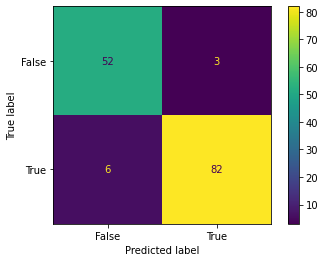

Accuracy:  0.9370629370629371


In [ ]:
from sklearn.datasets import load_breast_cancer
data = datasets.load_breast_cancer()
X = data.data
Y = data.target
Y[Y == 0] = -1
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

ada_model = AdaBoost()
ada_model.model(X_train, Y_train)

Y_predictions = ada_model.predict(X_test)
display_confusion(Y_test, Y_predictions)

In [ ]:
'''
Confusion Matrix:
[[45 3]
[ 0 66]]
---------------------------------------------------------
Accuracy :
97.36842105263158
'''

'\nConfusion Matrix:\n[[45 3]\n[ 0 66]]\n---------------------------------------------------------\nAccuracy :\n97.36842105263158\n'

Same thing, but with Spambase dataset.
Please download spambase_csv.csv from: https://datahub.io/machine-learning/spambase and save it into the same directory as this notebook.

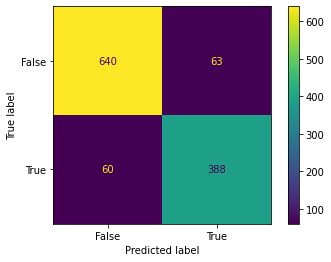

Accuracy:  0.893136403127715


In [ ]:
import pandas as pd

dp = pd.read_csv("spambase_csv.csv")

X = np.array(dp.iloc[:,:-1])
Y = np.array(dp.iloc[:,-1])

Y[Y == 0] = -1
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

ada_model = AdaBoost()
ada_model.model(X_train, Y_train)

Y_predictions = ada_model.predict(X_test)
display_confusion(Y_test, Y_predictions)